# Imports

In [ ]:
import zipfile
import os
import gdown
import shutil
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import random
from google.colab import drive

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Guardados

In [ ]:
# https://drive.google.com/file/d/1-0VUlnFSpkgbtoKQ_7l0CmT_BOEOXoVa/view?usp=sharing

id_file_test = '1-0VUlnFSpkgbtoKQ_7l0CmT_BOEOXoVa'
output_file_test = 'test.zip'  # Nombre del archivo en Colab

gdown.download(f'https://drive.google.com/uc?id={id_file_test}', output_file_test)

Downloading...
From (original): https://drive.google.com/uc?id=1-0VUlnFSpkgbtoKQ_7l0CmT_BOEOXoVa
From (redirected): https://drive.google.com/uc?id=1-0VUlnFSpkgbtoKQ_7l0CmT_BOEOXoVa&confirm=t&uuid=7a3768a1-1e97-4227-87bd-c8273693b531
To: /content/test.zip
100%|██████████| 821M/821M [00:07<00:00, 103MB/s] 


'test.zip'

In [ ]:
# https://drive.google.com/file/d/1aez5RY7Xgenh2K7NFD0w1mtRmJNBLgv_/view?usp=sharing

id_file_train = '1aez5RY7Xgenh2K7NFD0w1mtRmJNBLgv_'
output_file_train = 'train.zip'  # Nombre del archivo en Colab

gdown.download(f'https://drive.google.com/uc?id={id_file_train}', output_file_train)

Downloading...
From (original): https://drive.google.com/uc?id=1aez5RY7Xgenh2K7NFD0w1mtRmJNBLgv_
From (redirected): https://drive.google.com/uc?id=1aez5RY7Xgenh2K7NFD0w1mtRmJNBLgv_&confirm=t&uuid=d72c9ade-ff53-4386-9588-5b709ca3f40f
To: /content/train.zip
100%|██████████| 1.64G/1.64G [00:19<00:00, 82.6MB/s]


'train.zip'

In [ ]:
# Descomprimir el archivo zip
zip_file_test = 'test.zip'
extract_dir = 'test'

with zipfile.ZipFile(zip_file_test, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
# Descomprimir el archivo zip
zip_file_train = 'train.zip'
extract_dir = 'train'

with zipfile.ZipFile(zip_file_train, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


# Descarga de Espectrogramas.zip

In [ ]:
# https://drive.google.com/file/d/1KNyweNbteb38ugiCBcwy3kXACwVnT0lG/view?usp=sharing

id_file = '1KNyweNbteb38ugiCBcwy3kXACwVnT0lG'
output_file = 'Espectrogramas.zip'  # Nombre del archivo en Colab

gdown.download(f'https://drive.google.com/uc?id={id_file}', output_file)


Downloading...
From (original): https://drive.google.com/uc?id=1KNyweNbteb38ugiCBcwy3kXACwVnT0lG
From (redirected): https://drive.google.com/uc?id=1KNyweNbteb38ugiCBcwy3kXACwVnT0lG&confirm=t&uuid=06b23575-3dcc-4a61-8f64-5822d157d8e2
To: /content/Espectrogramas.zip
100%|██████████| 1.16G/1.16G [00:25<00:00, 46.0MB/s]


'Espectrogramas.zip'

In [ ]:

# Descomprimir el archivo zip
zip_file = 'Espectrogramas.zip'
extract_dir = ''

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


# Comienzo si hay que crear Test y Train

In [ ]:

base_dir = '/content/Entrenar'
"""
Estructura de Espectrogramas:
Espectrogramas
├── bird1
│   ├── spectrogram1.png
│   ├── spectrogram2.png
│   ├── ...
│   └── spectrogramN.png
├── bird2
│   ├── spectrogram1.png
│   ├── spectrogram2.png
│   ├── ...
│   └── spectrogramN.png
├── ...
Por 10 aves, con 4000 espectrogramas en cada carpeta
"""
# Recorrer las subcarpetas de Espectrogramas
for bird_folder in os.listdir(base_dir):
    bird_dir = os.path.join(base_dir, bird_folder)

    # Verificar si es una carpeta
    if os.path.isdir(bird_dir):
        if bird_folder == '.ipynb_checkpoints':
            # Eliminar la carpeta '.ipynb_checkpoints'
            shutil.rmtree(bird_dir)
            print(f"La carpeta '{bird_folder}' ha sido eliminada.")
        else:
            num_spectrograms = len(os.listdir(bird_dir))
            print(f"En la carpeta '{bird_folder}' hay {num_spectrograms} espectrogramas.")


En la carpeta 'houspa_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'norcar_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'sonspa_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'eursta_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'bncfly_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'comrav_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'houwre_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'gbwwre1_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'redcro_5_segundos_espectrograma' hay 4550 espectrogramas.
En la carpeta 'spotow_5_segundos_espectrograma' hay 4550 espectrogramas.


#### Eliminar excedentes de 4k

In [ ]:

train_dir = 'train_limpio'
test_dir = 'test_limpio'

# Crear directorios 'train' y 'test' si no existen
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Recorrer las subcarpetas de 'Espectrogramas'
for bird_folder in os.listdir(base_dir):
    bird_dir = os.path.join(base_dir, bird_folder)

    # Verificar si es una carpeta
    if os.path.isdir(bird_dir):
        images = os.listdir(bird_dir)
        num_images = len(images)

        # Ordenar las imágenes por nombre (asumiendo que los nombres son secuenciales)
        images.sort()

        # Crear directorios dentro de 'train' y 'test' para cada ave
        train_bird_dir = os.path.join(train_dir, bird_folder)
        test_bird_dir = os.path.join(test_dir, bird_folder)
        os.makedirs(train_bird_dir, exist_ok=True)
        os.makedirs(test_bird_dir, exist_ok=True)

        # Mover las primeras 2000 imágenes a 'train'
        for img in images[:3000]:
            src = os.path.join(bird_dir, img)
            dst = os.path.join(train_bird_dir, img)
            shutil.move(src, dst)
            print(f"Moviendo {img} a '{train_bird_dir}'.")

        # Mover las imágenes de la posición 3000 a 3999 a 'test'
        for img in images[3500:4000]:
            src = os.path.join(bird_dir, img)
            dst = os.path.join(test_bird_dir, img)
            shutil.move(src, dst)
            print(f"Moviendo {img} a '{test_bird_dir}'.")


Streaming output truncated to the last 5000 lines.
Moviendo XC306831_segment_9.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC309999_segment_1.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC309999_segment_2.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC309999_segment_3.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_1.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_2.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_3.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_4.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_5.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_6.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_7.png a 'train_limpio/redcro_5_segundos_espectrograma'.
Moviendo XC310000_segment_8.png a 'train_limpio

In [ ]:
"""CONTAR IMAGENES POR SUBCARPETAS"""
# Función para cambiar el nombre de las carpetas
def rename_folders(base_dir):
    for bird_folder in os.listdir(base_dir):
        bird_dir = os.path.join(base_dir, bird_folder)
        if os.path.isdir(bird_dir):
            new_name = bird_folder.split('_5_segundos_espectrograma')[0]
            new_bird_dir = os.path.join(base_dir, new_name)
            os.rename(bird_dir, new_bird_dir)
            print(f"Cambiado nombre de carpeta: {bird_dir} a {new_bird_dir}")

# Función para contar imágenes en una carpeta
def count_images(folder):
    count = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.png'):  # Asumiendo que las imágenes son archivos PNG
                count += 1
    return count


# Renombrar carpetas en el directorio 'train'
rename_folders(train_dir)

# Renombrar carpetas en el directorio 'test'
rename_folders(test_dir)

# Verificar las imágenes en la carpeta 'train'
print("Imágenes en la carpeta 'train':")
for bird_folder in os.listdir(train_dir):
    bird_dir = os.path.join(train_dir, bird_folder)
    if os.path.isdir(bird_dir):
        num_images = count_images(bird_dir)
        print(f"{bird_folder}: {num_images} imágenes")

# Verificar las imágenes en la carpeta 'test'
print("\nImágenes en la carpeta 'test':")
for bird_folder in os.listdir(test_dir):
    bird_dir = os.path.join(test_dir, bird_folder)
    if os.path.isdir(bird_dir):
        num_images = count_images(bird_dir)
        print(f"{bird_folder}: {num_images} imágenes")



Cambiado nombre de carpeta: train_limpio/houspa_5_segundos_espectrograma a train_limpio/houspa
Cambiado nombre de carpeta: train_limpio/norcar_5_segundos_espectrograma a train_limpio/norcar
Cambiado nombre de carpeta: train_limpio/sonspa_5_segundos_espectrograma a train_limpio/sonspa
Cambiado nombre de carpeta: train_limpio/eursta_5_segundos_espectrograma a train_limpio/eursta
Cambiado nombre de carpeta: train_limpio/bncfly_5_segundos_espectrograma a train_limpio/bncfly
Cambiado nombre de carpeta: train_limpio/comrav_5_segundos_espectrograma a train_limpio/comrav
Cambiado nombre de carpeta: train_limpio/houwre_5_segundos_espectrograma a train_limpio/houwre
Cambiado nombre de carpeta: train_limpio/gbwwre1_5_segundos_espectrograma a train_limpio/gbwwre1
Cambiado nombre de carpeta: train_limpio/redcro_5_segundos_espectrograma a train_limpio/redcro
Cambiado nombre de carpeta: train_limpio/spotow_5_segundos_espectrograma a train_limpio/spotow
Cambiado nombre de carpeta: test_limpio/houspa_5

In [ ]:


# Función para convertir a RGB y normalizar una imagen
def convert_and_normalize(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convertir a RGB si la imagen tiene canal alfa (RGBA)
    img_array = np.array(img)  # Convertir a numpy array
    img_array = img_array / 255.0  # Normalizar al rango [0, 1]
    img_array = (img_array * 255).astype(np.uint8)  # Convertir de nuevo a uint8
    img_normalized = Image.fromarray(img_array)  # Convertir de nuevo a imagen PIL
    img_normalized.save(img_path)  # Sobrescribir la imagen original

# Función para procesar todas las imágenes en una carpeta
def process_images_in_folder(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.png'):  # Asumiendo que las imágenes son archivos PNG
                img_path = os.path.join(root, file)
                convert_and_normalize(img_path)
                print(f"Procesando {img_path}")

# Normalizar imágenes en la carpeta 'train'
print("Procesando imágenes en la carpeta 'train'...")
for bird_folder in os.listdir(train_dir):
    bird_dir = os.path.join(train_dir, bird_folder)
    if os.path.isdir(bird_dir):
        process_images_in_folder(bird_dir)

# Normalizar imágenes en la carpeta 'test'
print("\nProcesando imágenes en la carpeta 'test'...")
for bird_folder in os.listdir(test_dir):
    bird_dir = os.path.join(test_dir, bird_folder)
    if os.path.isdir(bird_dir):
        process_images_in_folder(bird_dir)

print("\nProceso completado.")


Streaming output truncated to the last 5000 lines.
Procesando test_limpio/comrav/XC370026_segment_13.png
Procesando test_limpio/comrav/XC368509_segment_17.png
Procesando test_limpio/comrav/XC358148_segment_65.png
Procesando test_limpio/comrav/XC358167_segment_18.png
Procesando test_limpio/comrav/XC358148_segment_76.png
Procesando test_limpio/comrav/XC358074_segment_95.png
Procesando test_limpio/comrav/XC358074_segment_62.png
Procesando test_limpio/comrav/XC358074_segment_73.png
Procesando test_limpio/comrav/XC358148_segment_95.png
Procesando test_limpio/comrav/XC358549_segment_7.png
Procesando test_limpio/comrav/XC358172_segment_69.png
Procesando test_limpio/comrav/XC358074_segment_61.png
Procesando test_limpio/comrav/XC358147_segment_25.png
Procesando test_limpio/comrav/XC358148_segment_121.png
Procesando test_limpio/comrav/XC358147_segment_53.png
Procesando test_limpio/comrav/XC358172_segment_29.png
Procesando test_limpio/comrav/XC358167_segment_4.png
Procesando test_limpio/comrav/XC

In [ ]:

# Archivos zip de salida
train_zip = '/content/train_limpio.zip'
test_zip = '/content/test_limpio.zip'

# Función para comprimir una carpeta en un archivo zip
def zip_folder(folder_path, zip_path):
    shutil.make_archive(zip_path.split('.')[0], 'zip', folder_path)

# Comprimir las carpetas
zip_folder(train_dir, train_zip)
zip_folder(test_dir, test_zip)



In [ ]:

# Monta Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Copia train_limpio.zip y test_limpio.zip a Google Drive
!cp /content/train_limpio_FINAL.zip /content/drive/My\ Drive/
!cp /content/test_limpio_FINAL.zip /content/drive/My\ Drive/


# Comienzo con test y train cargado

In [ ]:

base_dir = '/content/test_limpio'

# Recorrer las subcarpetas dentro del directorio raíz
for bird_dir in os.listdir(base_dir):
    bird_path = os.path.join(base_dir, bird_dir)
    if os.path.isdir(bird_path):
        print(f"Procesando imágenes en {bird_path}:")
        # Recorre todas las imágenes dentro de la subcarpeta
        for img_name in os.listdir(bird_path):
            img_path = os.path.join(bird_path, img_name)
            if img_path.endswith('.png'):
                # Abre la imagen y obtiene sus dimensiones y canales
                img = Image.open(img_path)
                width, height = img.size
                channels = len(img.getbands())
                print(f"  Imagen: {img_name}, Dimensiones: {width} x {height}, Canales: {channels}")

print("Revisión de dimensiones completada.")


Se han truncado las últimas 5000 líneas del flujo de salida.
  Imagen: XC541545_segment_24.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC533266_segment_8.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC539118_segment_3.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC530706_segment_7.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC542030_segment_4.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC511028_segment_14.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC513501_segment_4.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC541441_segment_28.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC500500_segment_3.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC522713_segment_4.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC533271_segment_14.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC533266_segment_5.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC530706_segment_36.png, Dimensiones: 224 x 224, Canales: 3
  Imagen: XC541441_segment_23.png, Di

## Test de pares version 24-06

In [ ]:


def generate_half_half_pairs(base_dir):
    pairs = []
    labels = []
    used_images = set()
    used_pairs = set()
    bird_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

    # Calcular cuántos pares positivos y negativos queremos generar
    n_pairs_pos = 0
    n_pairs_neg = 0
    for bird in bird_folders:
        bird_path = os.path.join(base_dir, bird)
        bird_images = os.listdir(bird_path)
        half_images = len(bird_images) // 2  # Tomamos la mitad de las imágenes disponibles en cada carpeta
        n_pairs_pos += half_images // 2  # Mitad de la mitad para pares positivos
        n_pairs_neg += half_images // 2  # Mitad de la mitad para pares negativos

    for bird in bird_folders:
        bird_path = os.path.join(base_dir, bird)
        bird_images = os.listdir(bird_path)
        random.shuffle(bird_images)

        # Generar pares positivos
        for i in range(0, len(bird_images) - 1, 2):
            if i + 1 < len(bird_images) and len(pairs) < n_pairs_pos:
                img1 = os.path.join(bird_path, bird_images[i])
                img2 = os.path.join(bird_path, bird_images[i + 1])
                name1 = bird_images[i]
                name2 = bird_images[i + 1]
                pair_key = tuple(sorted([name1, name2]))  # Usar tupla ordenada como clave
                if pair_key not in used_pairs and name1 not in used_images and name2 not in used_images:
                    pairs.append((img1, img2))
                    labels.append(1)
                    used_pairs.add(pair_key)
                    used_images.update([name1, name2])

        # Generar pares negativos
        other_birds = [b for b in bird_folders if b != bird]
        for i in range(len(bird_images)):
            if len(pairs) >= n_pairs_pos + n_pairs_neg:
                break
            img1 = os.path.join(bird_path, bird_images[i])
            name1 = bird_images[i]
            if name1 not in used_images:
                for other_bird in other_birds:
                    other_bird_path = os.path.join(base_dir, other_bird)
                    other_bird_images = os.listdir(other_bird_path)
                    random.shuffle(other_bird_images)
                    for img2_name in other_bird_images:
                        if len(pairs) >= n_pairs_pos + n_pairs_neg:
                            break
                        img2 = os.path.join(other_bird_path, img2_name)
                        name2 = img2_name
                        pair_key = tuple(sorted([name1, name2]))  # Usar tupla ordenada como clave
                        if pair_key not in used_pairs and name2 not in used_images:
                            pairs.append((img1, img2))
                            labels.append(0)
                            used_pairs.add(pair_key)
                            used_images.update([name1, name2])
                            break

    return pairs, labels


In [ ]:
train_dir = '/content/train_limpio'
test_dir = '/content/test_limpio'
pairs, labels = generate_half_half_pairs(train_dir)
pairs_test, labels_test = generate_half_half_pairs(test_dir)
print(f"Número de pares generados: {len(pairs)}")
print(f"Número de etiquetas generadas: {len(labels)}")
data = {'pairs': pairs, 'labels': labels}

print(f"Número de pares generados: {len(pairs_test)}")
print(f"Número de etiquetas generadas: {len(labels_test)}")
data_test = {'pairs_test': pairs_test, 'labels_test': labels_test}

def count_positive_negative_pairs(data):
    labels = data['labels']
    positive_count = sum(1 for label in labels if label == 1)
    negative_count = sum(1 for label in labels if label == 0)
    return positive_count, negative_count

def count_positive_negative_pairs_test(data):
    labels = data['labels_test']
    positive_count = sum(1 for label in labels if label == 1)
    negative_count = sum(1 for label in labels if label == 0)
    return positive_count, negative_count

# Contar pares positivos y negativos desde data
positive_count, negative_count = count_positive_negative_pairs(data)

print(f"Número de pares positivos: {positive_count}")
print(f"Número de pares negativos: {negative_count}")

# Contar pares positivos y negativos desde data
positive_count_test, negative_count_test = count_positive_negative_pairs_test(data_test)

print(f"Número de pares positive_count_test: {positive_count_test}")
print(f"Número de pares negative_count_test: {negative_count_test}")


Número de pares generados: 15000
Número de etiquetas generadas: 15000
Número de pares generados: 2500
Número de etiquetas generadas: 2500
Número de pares positivos: 7500
Número de pares negativos: 7500
Número de pares positive_count_test: 1250
Número de pares negative_count_test: 1250


In [ ]:


# Guardar data en un archivo
with open('dataTrain_limpio.pickle', 'wb') as f:
    pickle.dump(data, f)

# Guardar data_test en un archivo
with open('data_test_limpio.pickle', 'wb') as f:
    pickle.dump(data_test, f)

# # Cargar data desde el archivo
# with open('data.pickle', 'rb') as f:
#     data = pickle.load(f)

# # Cargar data_test desde el archivo
# with open('data_test.pickle', 'rb') as f:
#     data_test = pickle.load(f)

print(f"Número de pares generados (data): {len(data['pairs'])}")
print(f"Número de etiquetas generadas (data): {len(data['labels'])}")

print(f"Número de pares generados (data_test): {len(data_test['pairs_test'])}")
print(f"Número de etiquetas generadas (data_test): {len(data_test['labels_test'])}")


Número de pares generados (data): 15000
Número de etiquetas generadas (data): 15000
Número de pares generados (data_test): 2500
Número de etiquetas generadas (data_test): 2500


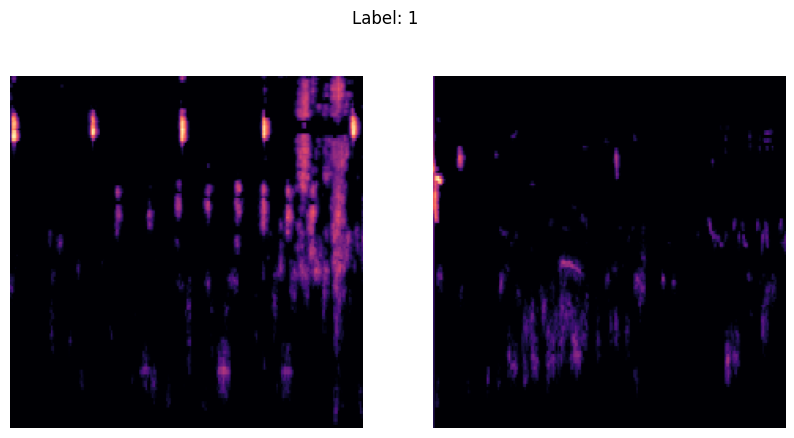

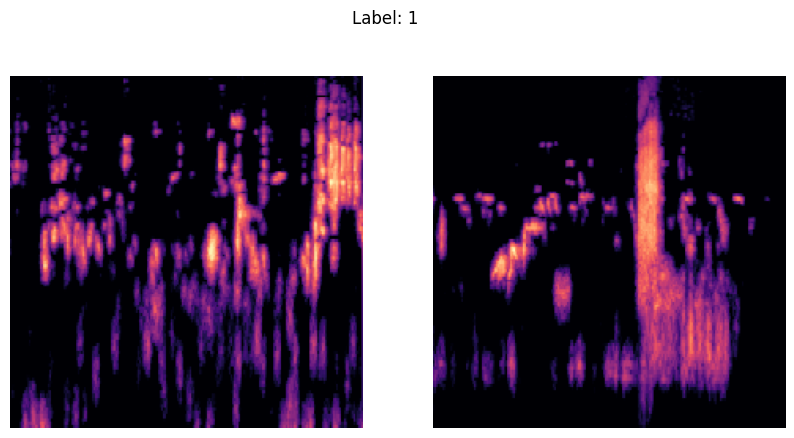

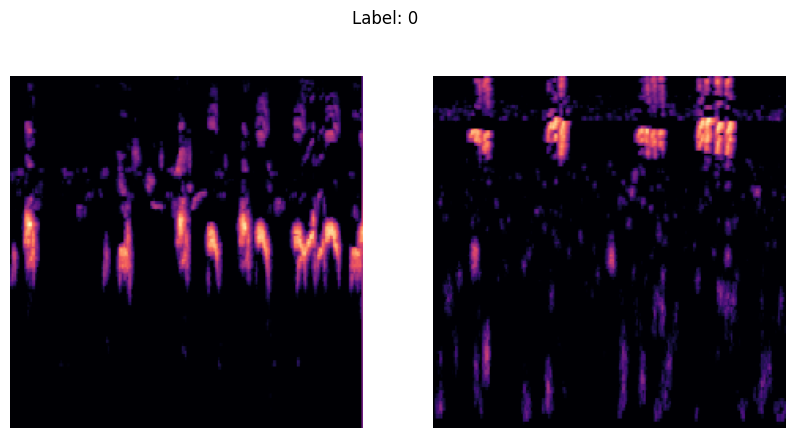

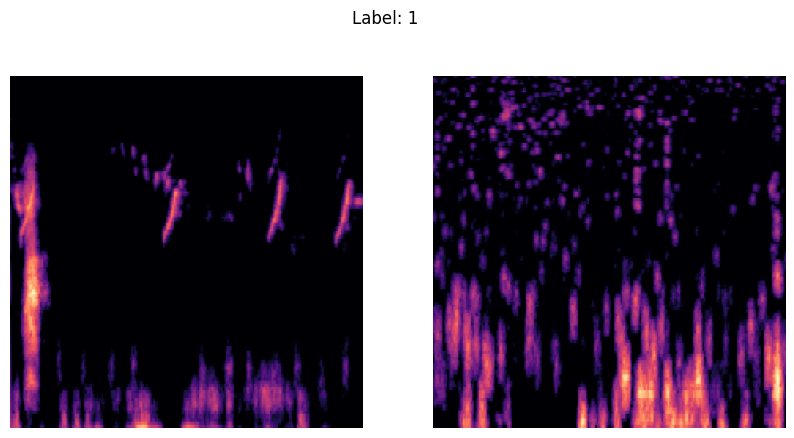

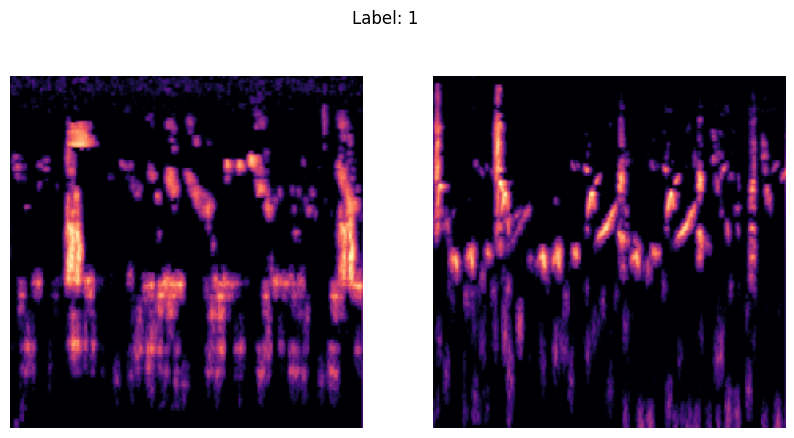

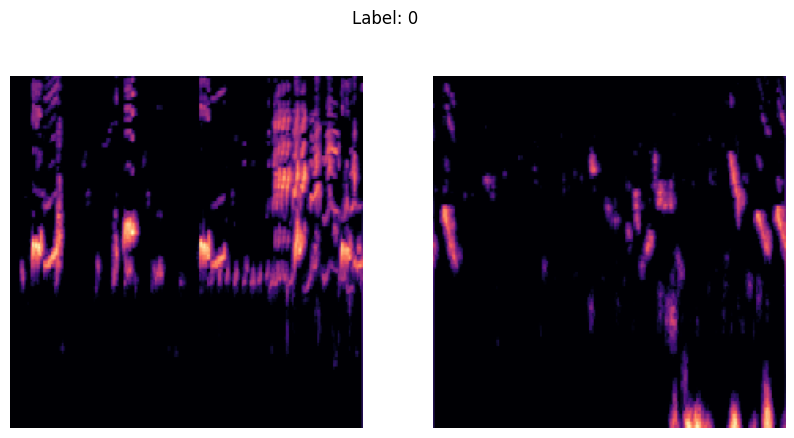

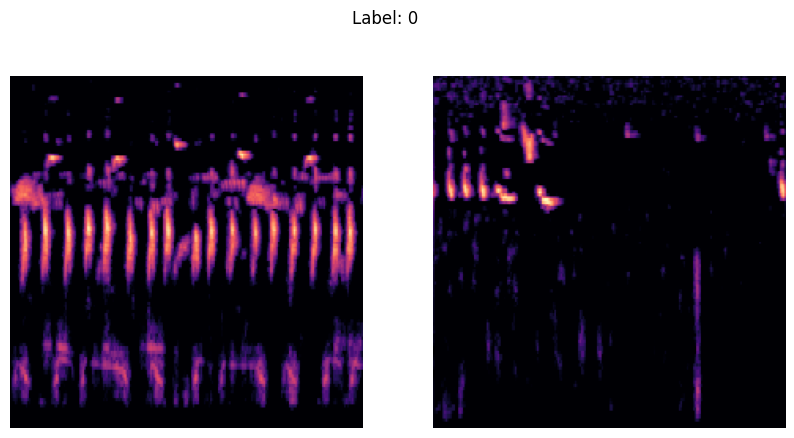

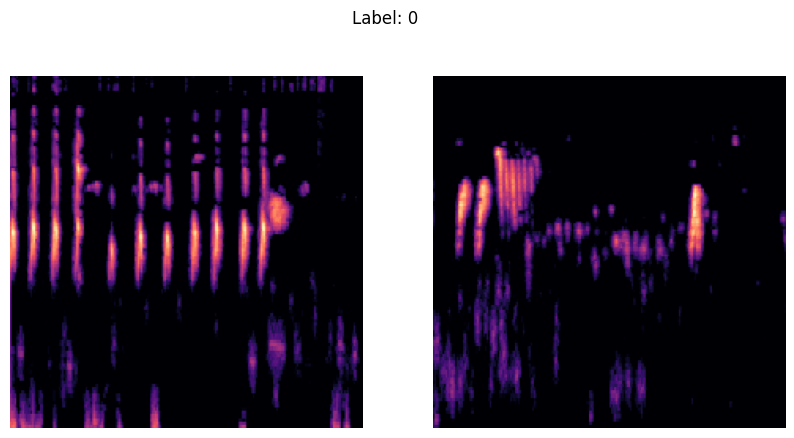

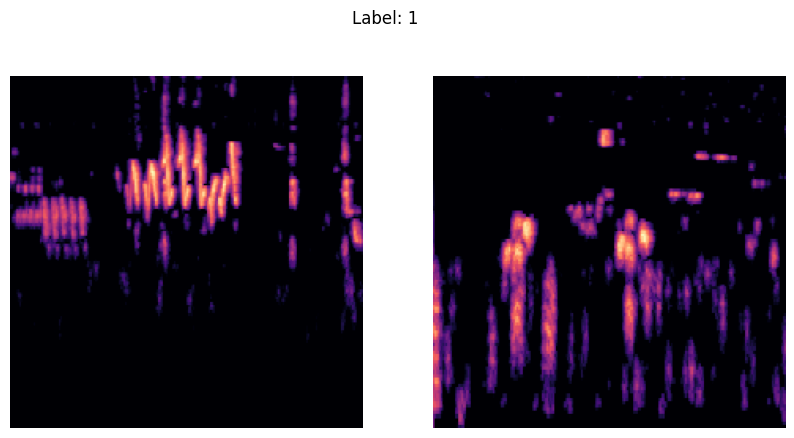

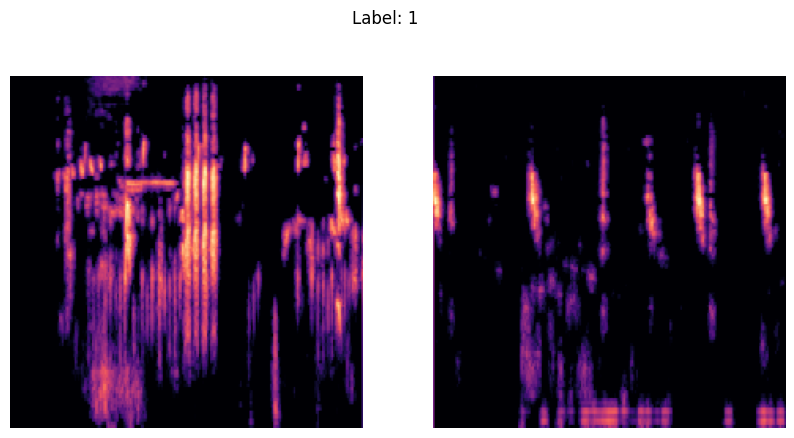

In [ ]:


def plot_image_pair(img1, img2, label):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
    ax[0].imshow(img1)
    ax[0].axis('off')  # Desactiva los ejes si lo prefieres
    ax[1].imshow(img2)
    ax[1].axis('off')  # Desactiva los ejes si lo prefieres
    plt.suptitle(f'Label: {label}')
    plt.show()

random_indices = random.sample(range(len(pairs)), 5)
for idx in random_indices:
    # Mostrar pares positivos
    plot_image_pair(np.array(Image.open(pairs[idx][0])), np.array(Image.open(pairs[idx][1])), labels[idx])

    # Mostrar pares negativos
    random_negative_idx = random.randint(0, len(pairs) - 1)
    plot_image_pair(np.array(Image.open(pairs[random_negative_idx][0])), np.array(Image.open(pairs[random_negative_idx][1])), labels[random_negative_idx])


In [ ]:


# Ejemplo de función para cargar y verificar una imagen
def load_and_check_image(image_path):
    image = np.array(Image.open(image_path))  # Cargar imagen como un arreglo numpy
    print(f"Dimensiones de la imagen: {image.shape}")  # Verificar dimensiones
    print(f"Tipo de datos de la imagen: {image.dtype}")  # Verificar tipo de datos
    print(f"Rango de valores de la imagen: ({np.min(image)}, {np.max(image)})")  # Verificar rango de valores

# Ejemplo de uso para una imagen específica
image_path = '/content/test_limpio/bncfly/XC154098_segment_9.png'  # Ruta de la imagen
load_and_check_image(image_path)


Dimensiones de la imagen: (224, 224, 3)
Tipo de datos de la imagen: uint8
Rango de valores de la imagen: (0, 254)


## División Dataset Train/Val

In [ ]:


# Dividir los datos en entrenamiento y validación
pairs_train, pairs_val, labels_train, labels_val = train_test_split(data['pairs'], data['labels'], test_size=0.2, random_state=42)

# Convertir las listas a arrays numpy para facilitar el procesamiento
pairs_train = np.array(pairs_train)
pairs_val = np.array(pairs_val)
labels_train = np.array(labels_train)
labels_val = np.array(labels_val)


## Modelo

In [ ]:


# Tamaño de las imágenes
input_shape = (224, 224, 3)

# Función para crear el modelo base (ResNet50)
def create_base_network(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Función para calcular la distancia euclidiana
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sum_squared = tf.keras.backend.sum(tf.keras.backend.square(featsA - featsB), axis=1, keepdims=True)
    return tf.keras.backend.sqrt(tf.keras.backend.maximum(sum_squared, tf.keras.backend.epsilon()))

# Entradas
imgA = Input(shape=input_shape)
imgB = Input(shape=input_shape)

# Modelo base
base_network = create_base_network(input_shape)

# Features
featsA = base_network(imgA)
featsB = base_network(imgB)

# Distancia euclidiana
distance = Lambda(euclidean_distance)([featsA, featsB])

# Salida
outputs = Dense(1, activation="sigmoid")(distance)

# Modelo siamesa
model = Model(inputs=[imgA, imgB], outputs=outputs)

# Compilar el modelo
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Mostrar resumen del modelo
model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 model (Functional)          (None, 2048)                 2358771   ['input_1[0][0]',             
                                                          2          'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)           

In [ ]:
def data_generator(pairs, labels, batch_size):
    while True:
        indices = np.arange(len(pairs))
        np.random.shuffle(indices)
        for start in range(0, len(pairs), batch_size):
            end = min(start + batch_size, len(pairs))
            batch_indices = indices[start:end]
            batch_pairs = pairs[batch_indices]
            batch_labels = labels[batch_indices]

            imgsA = []
            imgsB = []
            for (imgA_path, imgB_path) in batch_pairs:
                imgA = np.array(Image.open(imgA_path).convert('RGB')) / 255.0
                imgB = np.array(Image.open(imgB_path).convert('RGB')) / 255.0
                imgsA.append(imgA)
                imgsB.append(imgB)

            yield [np.array(imgsA), np.array(imgsB)], np.array(batch_labels)


## Entrenamiento

In [ ]:
# Parámetros
batch_size = 32
epochs = 10

# Generadores de datos
train_generator = data_generator(pairs_train, labels_train, batch_size)
val_generator = data_generator(pairs_val, labels_val, batch_size)

# Número de pasos por época
steps_per_epoch = len(pairs_train) // batch_size
validation_steps = len(pairs_val) // batch_size

# Entrenar el modelo
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    epochs=epochs)


Epoch 1/10
375/375 [==============================] - 340s 788ms/step - loss: 1.0219 - accuracy: 0.5047 - val_loss: 0.7733 - val_accuracy: 0.4980
Epoch 2/10
375/375 [==============================] - 295s 787ms/step - loss: 0.4115 - accuracy: 0.7513 - val_loss: 0.4099 - val_accuracy: 0.6631
Epoch 3/10
375/375 [==============================] - 273s 729ms/step - loss: 0.3696 - accuracy: 0.9467 - val_loss: 0.4038 - val_accuracy: 0.7109
Epoch 4/10
375/375 [==============================] - 273s 729ms/step - loss: 0.3661 - accuracy: 0.9572 - val_loss: 0.3669 - val_accuracy: 0.9693
Epoch 5/10
375/375 [==============================] - 273s 727ms/step - loss: 0.3339 - accuracy: 0.9797 - val_loss: 0.3671 - val_accuracy: 0.9569
Epoch 6/10
375/375 [==============================] - 273s 727ms/step - loss: 0.3218 - accuracy: 0.9843 - val_loss: 0.3771 - val_accuracy: 0.9390
Epoch 7/10
375/375 [==============================] - 273s 727ms/step - loss: 0.3219 - accuracy: 0.9778 - val_loss: 0.3326 -

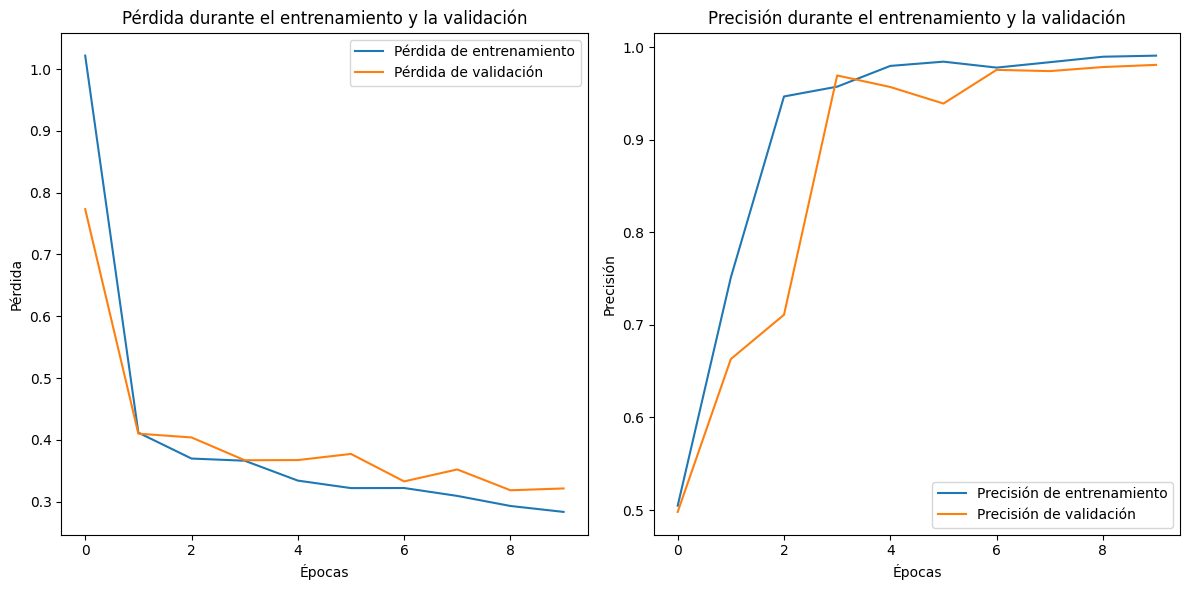

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

plt.tight_layout()
plt.show()

## Pesos guardados

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Guardar los pesos del modelo en Google Drive
model.save_weights('/content/drive/My Drive/Pesos_Siamesas_Limpias.h5')

# https://drive.google.com/file/d/1BJNvLb_pmjnrIXZDhDVh8XHX3H33kwQE/view?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Test

In [ ]:

# Genera predicciones
def generate_predictions(pairs, labels, batch_size):
    preds = []
    true_labels = []
    for i in range(0, len(pairs), batch_size):
        end = min(i + batch_size, len(pairs))
        batch_pairs = pairs[i:end]
        batch_labels = labels[i:end]

        imgsA = []
        imgsB = []
        for (imgA_path, imgB_path) in batch_pairs:
            imgA = np.array(Image.open(imgA_path).convert('RGB')) / 255.0
            imgB = np.array(Image.open(imgB_path).convert('RGB')) / 255.0
            imgsA.append(imgA)
            imgsB.append(imgB)

        preds_batch = model.predict([np.array(imgsA), np.array(imgsB)])
        preds.extend(preds_batch)
        true_labels.extend(batch_labels)

    return np.array(preds), np.array(true_labels)

# Genera predicciones para el conjunto de test
preds_test, true_labels_test = generate_predictions(pairs_test, labels_test, batch_size)

# Convertir predicciones a etiquetas binarias
preds_test_bin = (preds_test > 0.5).astype(int)

# Calcula métricas
accuracy = accuracy_score(true_labels_test, preds_test_bin)
precision = precision_score(true_labels_test, preds_test_bin)
recall = recall_score(true_labels_test, preds_test_bin)
f1 = f1_score(true_labels_test, preds_test_bin)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1/1 [==============================] - 2s 2s/step
Accuracy: 0.9076
Precision: 0.8521078092605391
Recall: 0.9864
F1 Score: 0.9143492769744161


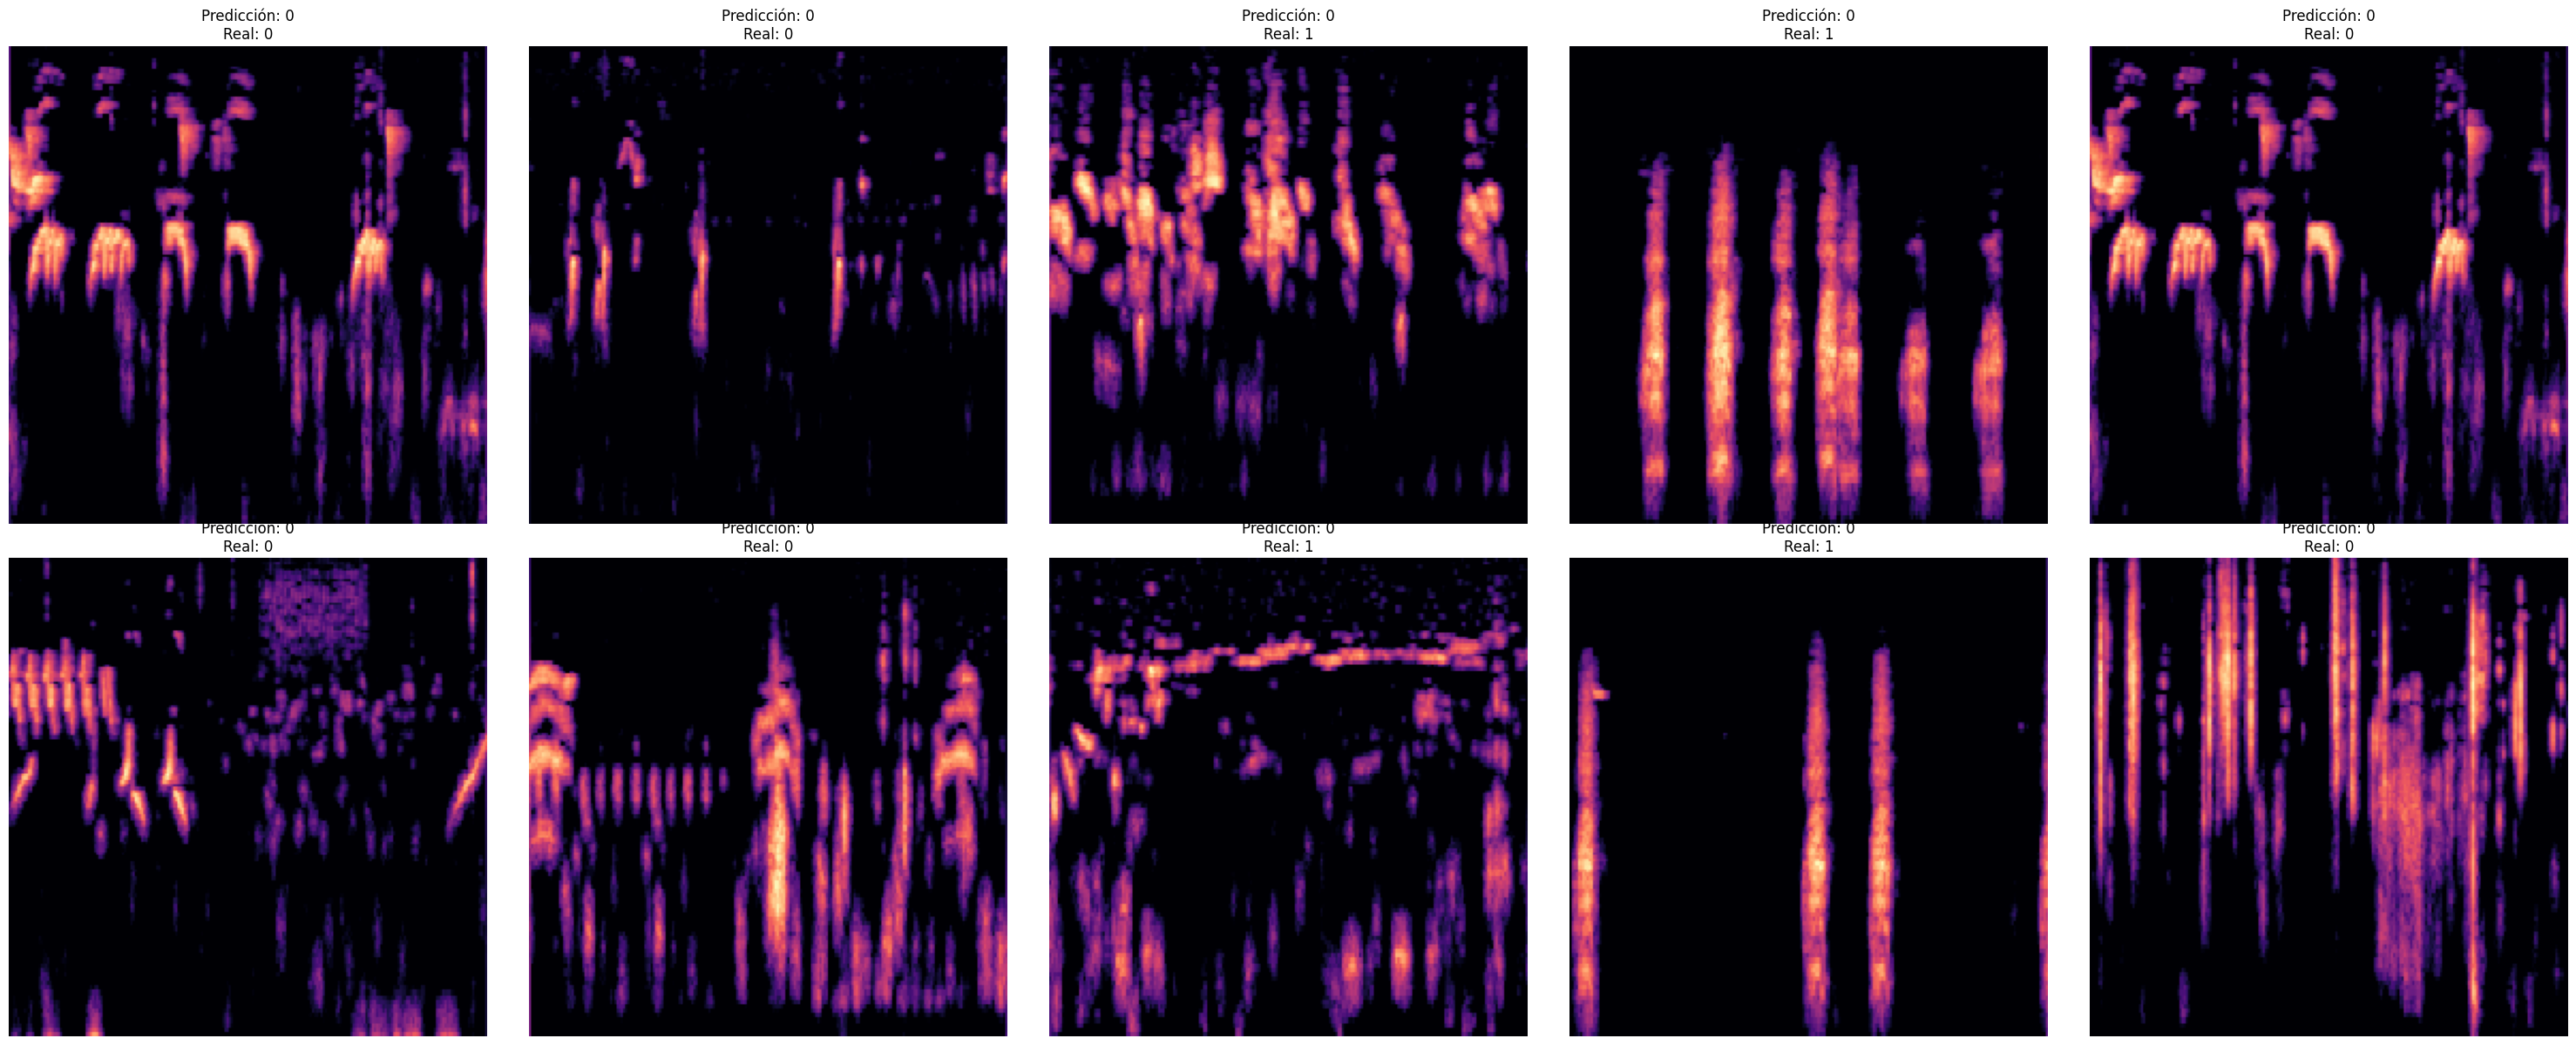

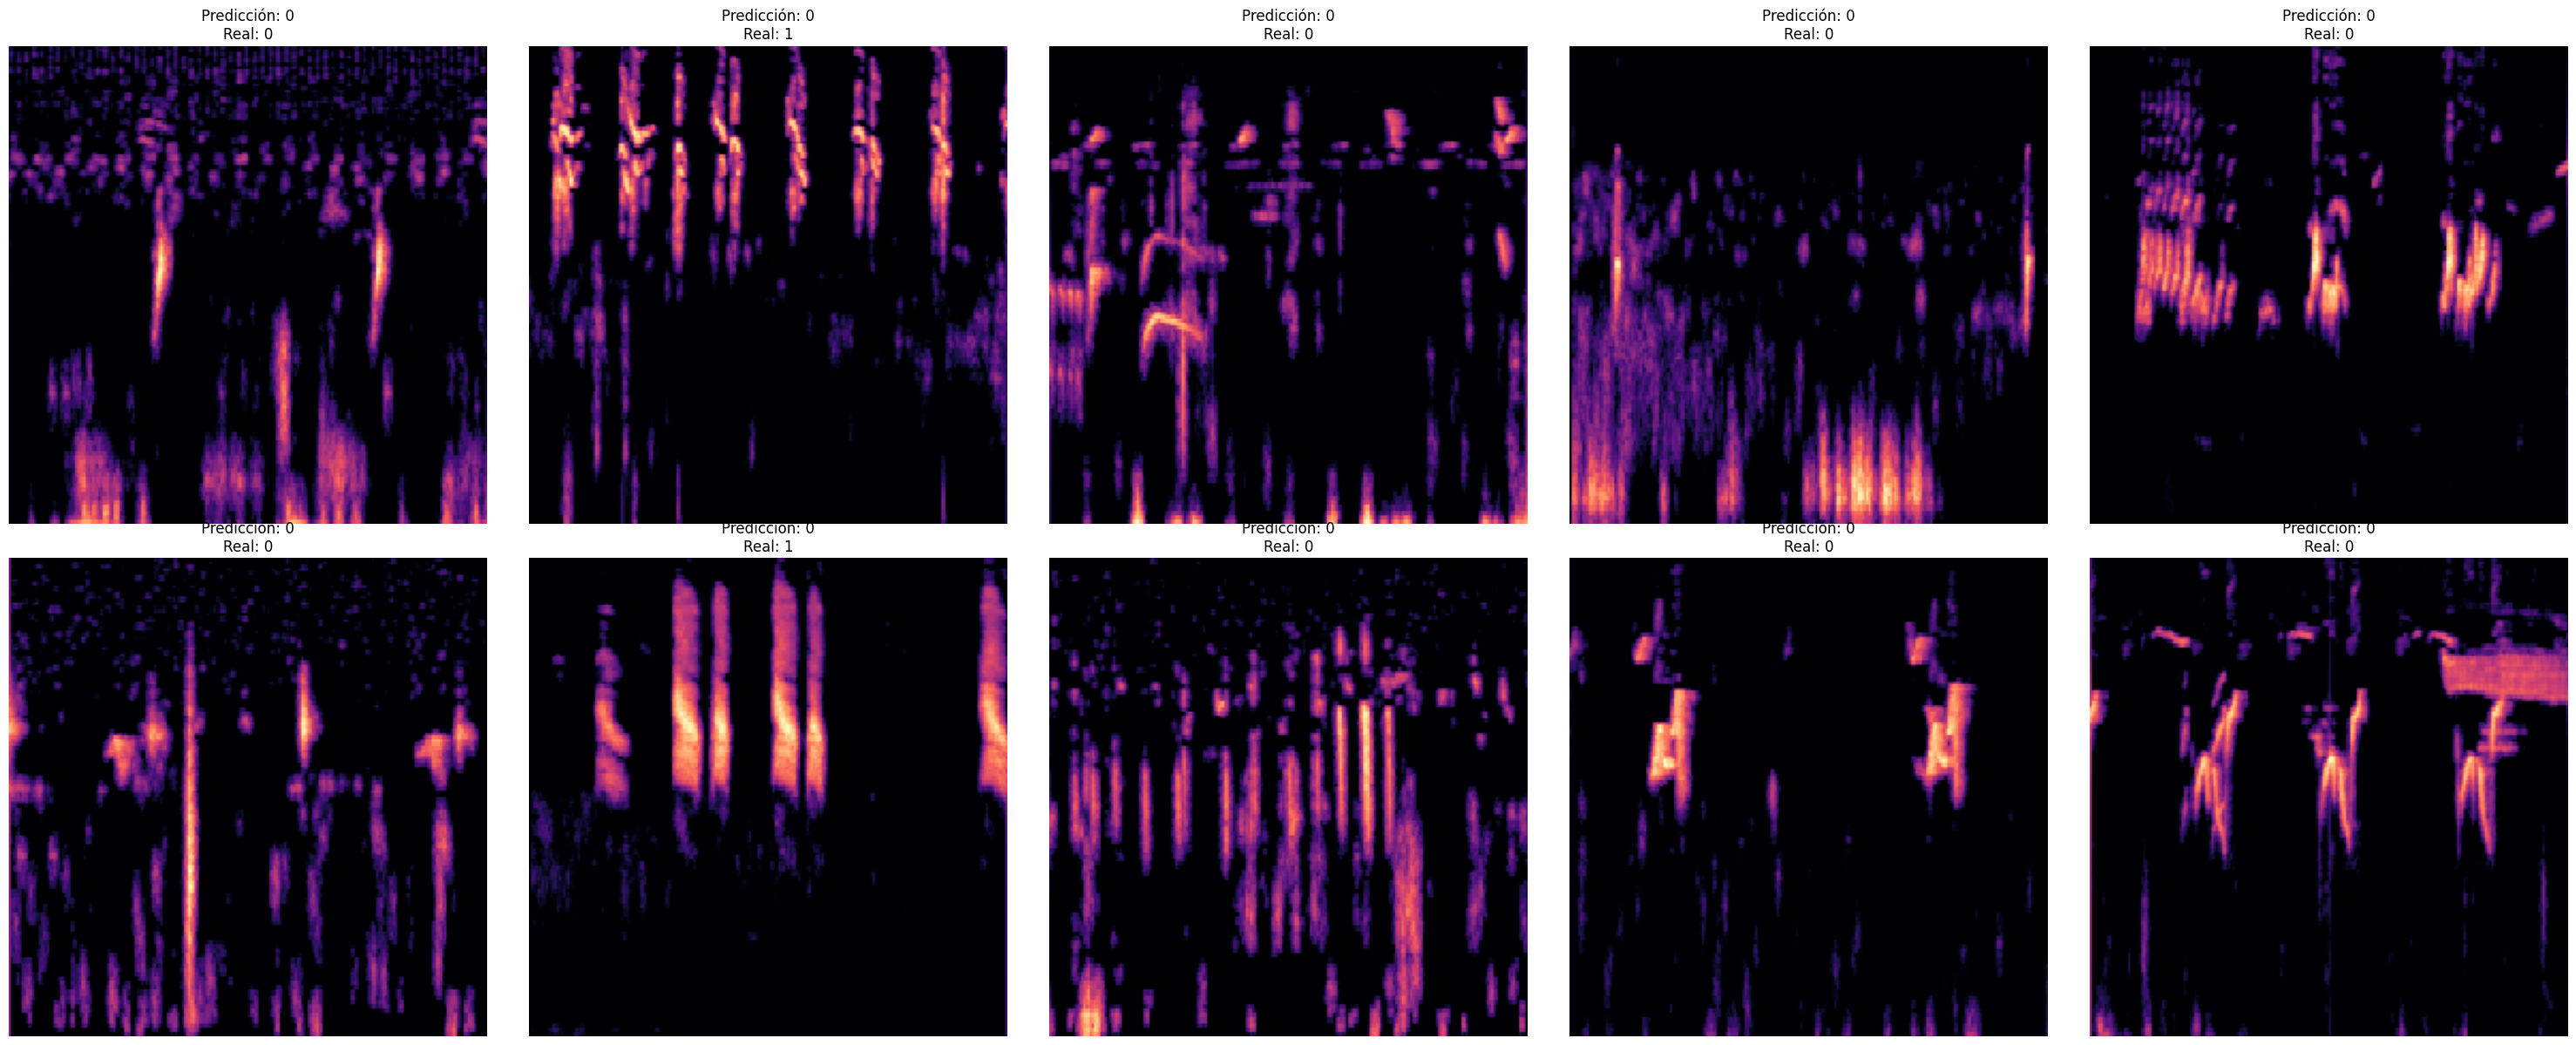

In [ ]:
# 7 de 10
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Función para mostrar imágenes y predicciones
def show_predictions(pairs, true_labels, preds, num=5, img_size=(6, 6)):
    plt.figure(figsize=(img_size[0] * num, img_size[1] * 2))
    random_indices = np.random.choice(len(pairs), num, replace=False)

    for i, idx in enumerate(random_indices):
        imgA_path, imgB_path = pairs[idx]
        imgA = Image.open(imgA_path).convert('RGB')
        imgB = Image.open(imgB_path).convert('RGB')

        predicted_class = int(preds[idx][0])

        plt.subplot(2, num, i + 1)
        plt.imshow(imgA)
        plt.axis('off')
        plt.title(f"Predicción: {predicted_class}\nReal: {true_labels[idx]}")

        plt.subplot(2, num, i + 1 + num)
        plt.imshow(imgB)
        plt.axis('off')
        plt.title(f"Predicción: {predicted_class}\nReal: {true_labels[idx]}")

    plt.tight_layout()
    plt.show()

# Mostrar 10 predicciones con imágenes más grandes
show_predictions(pairs_test, true_labels_test, preds_test, num=5, img_size=(6, 6))
show_predictions(pairs_test, true_labels_test, preds_test, num=5, img_size=(6, 6))


In [ ]:
# 7 de 10

# Función para mostrar predicciones y valores reales sin visualizar las imágenes
def show_predictions_as_text(pairs, true_labels, preds, num=10):
    random_indices = np.random.choice(len(pairs), num, replace=False)

    print("Predicciones vs Valores Reales:")
    for i, idx in enumerate(random_indices):
        imgA_path, imgB_path = pairs[idx]
        predicted_class = int(preds[idx][0])
        true_class = true_labels[idx]

        print(f"Pares de imágenes: {imgA_path}, {imgB_path}")
        print(f"Predicción: {predicted_class}, Real: {true_class}\n")

# Mostrar 10 predicciones como texto
show_predictions_as_text(pairs_test, true_labels_test, preds_test, num=10)


Predicciones vs Valores Reales:
Pares de imágenes: /content/test_limpio/comrav/XC358148_segment_105.png, /content/test_limpio/comrav/XC358148_segment_20.png
Predicción: 0, Real: 1

Pares de imágenes: /content/test_limpio/bncfly/XC247711_segment_7.png, /content/test_limpio/norcar/XC415922_segment_4.png
Predicción: 0, Real: 0

Pares de imágenes: /content/test_limpio/bncfly/XC268662_segment_31.png, /content/test_limpio/gbwwre1/XC529381_segment_1.png
Predicción: 0, Real: 0

Pares de imágenes: /content/test_limpio/bncfly/XC268667_segment_20.png, /content/test_limpio/redcro/XC522636_segment_50.png
Predicción: 0, Real: 0

Pares de imágenes: /content/test_limpio/bncfly/XC268664_segment_59.png, /content/test_limpio/norcar/XC419039_segment_12.png
Predicción: 0, Real: 0

Pares de imágenes: /content/test_limpio/bncfly/XC268663_segment_13.png, /content/test_limpio/gbwwre1/XC532514_segment_6.png
Predicción: 0, Real: 0

Pares de imágenes: /content/test_limpio/sonspa/XC434349_segment_4.png, /content/t

1/1 [==============================] - 0s 30ms/step


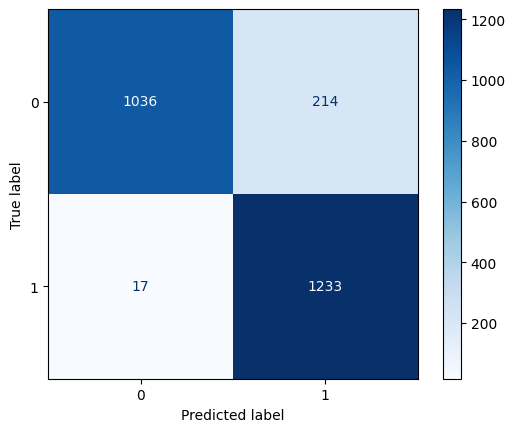

Matriz de confusión:
[[1036  214]
 [  17 1233]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Función para generar predicciones y etiquetas reales
def generate_predictions(pairs, labels, batch_size):
    preds = []
    true_labels = []
    for i in range(0, len(pairs), batch_size):
        end = min(i + batch_size, len(pairs))
        batch_pairs = pairs[i:end]
        batch_labels = labels[i:end]

        imgsA = []
        imgsB = []
        for (imgA_path, imgB_path) in batch_pairs:
            imgA = np.array(Image.open(imgA_path).convert('RGB')) / 255.0
            imgB = np.array(Image.open(imgB_path).convert('RGB')) / 255.0
            imgsA.append(imgA)
            imgsB.append(imgB)

        preds_batch = model.predict([np.array(imgsA), np.array(imgsB)])
        preds.extend(preds_batch)
        true_labels.extend(batch_labels)

    return np.array(preds), np.array(true_labels)

# Generar predicciones para el conjunto de test
preds_test, true_labels_test = generate_predictions(pairs_test, labels_test, batch_size)

# Convertir predicciones a etiquetas binarias
preds_test_bin = (preds_test > 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels_test, preds_test_bin)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(cm)
